<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/1_3_pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas 시작- 파일을 DataFrame 로딩, 기본 API

In [8]:
import pandas as pd

In [14]:
!rm -r python101/
!git clone https://github.com/minyoung347/python101.git

Cloning into 'python101'...
remote: Enumerating objects: 852, done.
remote: Counting objects: 100% (852/852), done.
remote: Compressing objects: 100% (427/427), done.
remote: Total 852 (delta 440), reused 811 (delta 421), pack-reused 0
Receiving objects: 100% (852/852), 92.21 MiB | 28.66 MiB/s, done.
Resolving deltas: 100% (440/440), done.
Updating files: 100% (63/63), done.


In [17]:
#df = pd.read_csv('/content/python101/input/SP500HistoricalData.csv')
df = pd.read_csv('/content/python101/input/SP500HistoricalData1.csv')


In [18]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/11/2024,"5,375.32","5,353.00","5,375.95","5,327.25",NaN,0.27%
1,06/10/2024,"5,360.79","5,341.22","5,365.79","5,331.52",NaN,0.26%
2,06/07/2024,"5,346.99","5,343.81","5,375.08","5,331.33",NaN,-0.11%
3,06/06/2024,"5,352.96","5,357.80","5,362.35","5,335.36",NaN,-0.02%
4,06/05/2024,"5,354.03","5,314.48","5,354.16","5,297.64",NaN,1.18%
...,...,...,...,...,...,...,...
1365,01/08/2019,"2,574.40","2,568.10","2,579.80","2,547.60",NaN,0.97%
1366,01/07/2019,"2,549.70","2,535.60","2,566.20","2,524.60",NaN,0.70%
1367,01/04/2019,"2,531.90","2,474.30","2,538.10","2,474.30",NaN,3.43%
1368,01/03/2019,"2,447.90","2,491.90","2,493.10","2,444.00",NaN,-2.47%


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1370 non-null   object 
 1   Price     1370 non-null   object 
 2   Open      1370 non-null   object 
 3   High      1370 non-null   object 
 4   Low       1370 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1370 non-null   object 
dtypes: float64(1), object(6)
memory usage: 75.0+ KB


In [7]:
df.describe()

,Vol.
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1125 non-null   object 
 1   Price     1125 non-null   object 
 2   Open      1125 non-null   object 
 3   High      1125 non-null   object 
 4   Low       1125 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1125 non-null   object 
dtypes: float64(1), object(6)
memory usage: 61.6+ KB


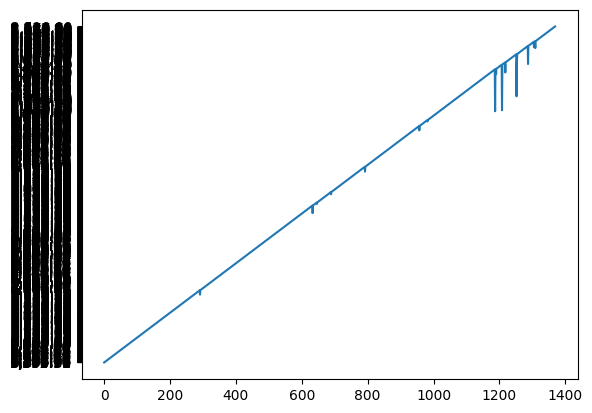

In [20]:
import matplotlib.pyplot as plt
plt.plot(df.Price)
plt.show()

In [21]:
df.dtypes

Date         object
Price        object
Open         object
High         object
Low          object
Vol.        float64
Change %     object
dtype: object

In [22]:
df.astype({'Price': 'float'})

ValueError: could not convert string to float: '5,375.32': Error while type casting for column 'Price'

In [ ]:
# df.astype({'Date': 'str', 'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'})

ValueError: ignored

In [23]:
def remove_comma(x):
    return x.replace(',', '')

In [24]:
def remove_comma_float(x):
    return float(x.replace(',', ''))

In [25]:
df['Price'].apply(remove_comma_float)

0       5375.32
1       5360.79
2       5346.99
3       5352.96
4       5354.03
         ...   
1365    2574.40
1366    2549.70
1367    2531.90
1368    2447.90
1369    2510.00
Name: Price, Length: 1370, dtype: float64

In [26]:
df['Price'] = df['Price'].apply(remove_comma_float)

In [27]:
df['Open'] = df['Open'].apply(remove_comma_float)

In [28]:
df['High'] = df['High'].apply(remove_comma_float)
df['Low'] = df['Low'].apply(remove_comma_float)

In [29]:
df.describe()

,Price,Open,High,Low,Vol.
count,1370.000000,1370.000000,1370.000000,1370.000000,0.0
mean,3864.527314,3863.484080,3886.063920,3839.640102,NaN
std,710.204626,710.124624,711.202345,709.097308,NaN
min,2237.400000,2290.700000,2300.700000,2191.900000,NaN
25%,3215.600000,3213.850000,3226.625000,3196.650000,NaN
50%,3967.875000,3964.045000,3992.620000,3935.905000,NaN
75%,4400.525000,4402.900000,4422.515000,4381.305000,NaN
max,5375.320000,5357.800000,5375.950000,5335.360000,NaN


In [30]:
import matplotlib.pyplot as plt

In [31]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/11/2024,5375.32,5353.00,5375.95,5327.25,NaN,0.27%
1,06/10/2024,5360.79,5341.22,5365.79,5331.52,NaN,0.26%
2,06/07/2024,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%
3,06/06/2024,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%
4,06/05/2024,5354.03,5314.48,5354.16,5297.64,NaN,1.18%
...,...,...,...,...,...,...,...
1365,01/08/2019,2574.40,2568.10,2579.80,2547.60,NaN,0.97%
1366,01/07/2019,2549.70,2535.60,2566.20,2524.60,NaN,0.70%
1367,01/04/2019,2531.90,2474.30,2538.10,2474.30,NaN,3.43%
1368,01/03/2019,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%


In [ ]:
import matplotlib.pyplot as plt

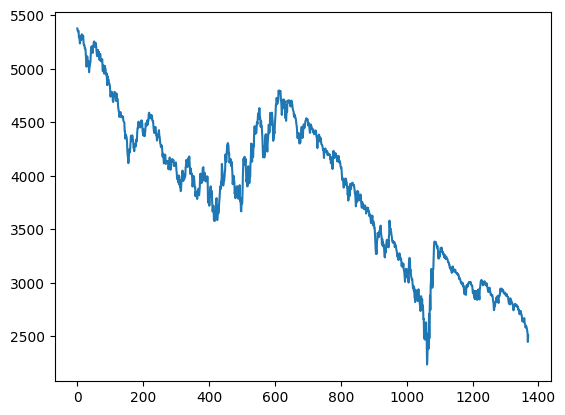

In [32]:
plt.plot(df['Price'])
plt.show()

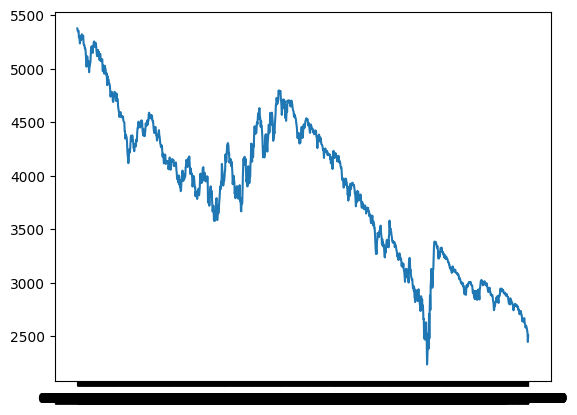

In [33]:
plt.plot(df['Date'], df['Price'])
plt.show()

In [34]:
df['Date']

0       06/11/2024
1       06/10/2024
2       06/07/2024
3       06/06/2024
4       06/05/2024
           ...    
1365    01/08/2019
1366    01/07/2019
1367    01/04/2019
1368    01/03/2019
1369    01/02/2019
Name: Date, Length: 1370, dtype: object

In [35]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

<ipython-input-35-45a55d54a14d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1370 non-null   datetime64[ns]
 1   Price     1370 non-null   float64       
 2   Open      1370 non-null   float64       
 3   High      1370 non-null   float64       
 4   Low       1370 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1370 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 75.0+ KB


In [37]:
df.set_index('Date', inplace=True)

In [38]:
df.sort_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1125 non-null   datetime64[ns]
 1   Price     1125 non-null   float64       
 2   Open      1125 non-null   float64       
 3   High      1125 non-null   float64       
 4   Low       1125 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1125 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 61.6+ KB


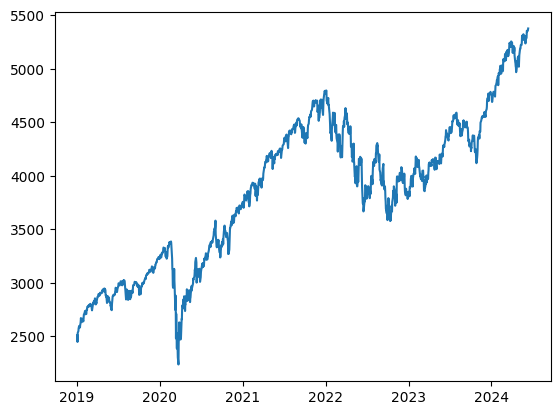

In [39]:
plt.plot(df['Price'])
plt.show()

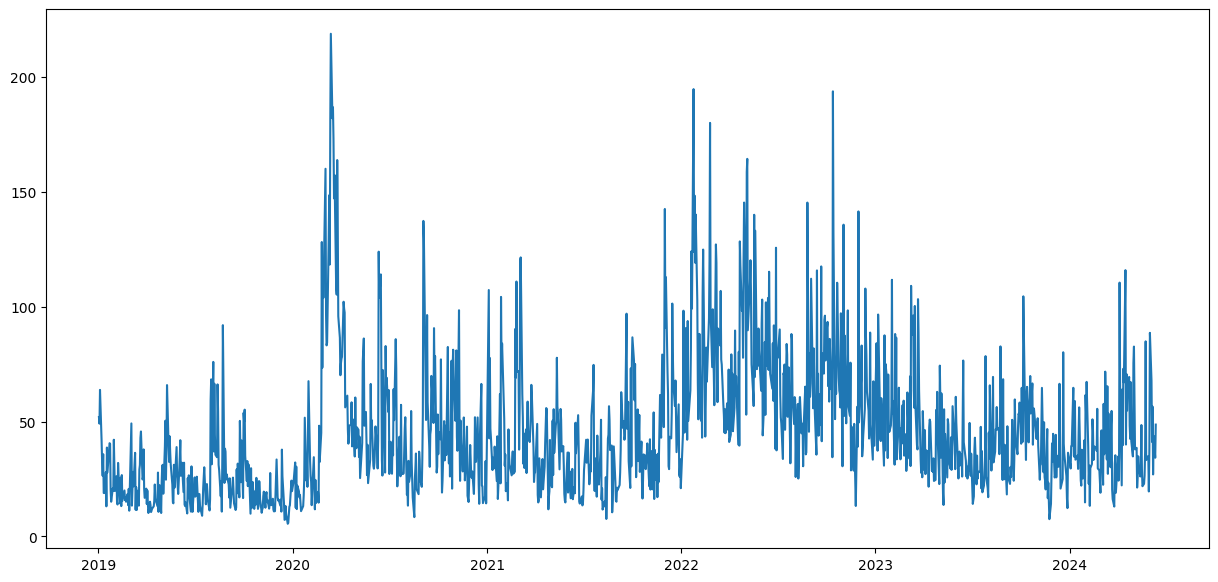

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(df['High'] - df['Low'])
plt.show()

In [52]:
import os
os.getcwd()

'/content'

KeyError: ignored

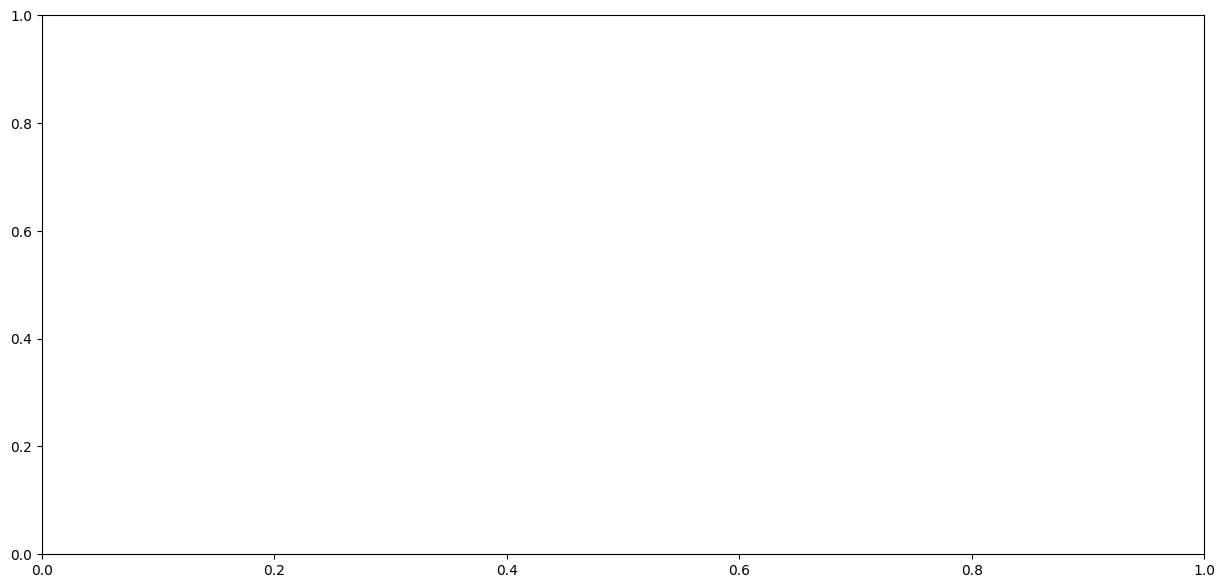

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(df['Date'], df['High'] - df['Low'])
plt.show()

In [ ]:
df.set_index('Date', inplace=True)

In [41]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-02,2510.00,2477.00,2519.50,2467.50,NaN,0.13%
2019-01-03,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%
2019-01-04,2531.90,2474.30,2538.10,2474.30,NaN,3.43%
2019-01-07,2549.70,2535.60,2566.20,2524.60,NaN,0.70%
2019-01-08,2574.40,2568.10,2579.80,2547.60,NaN,0.97%
...,...,...,...,...,...,...
2024-06-05,5354.03,5314.48,5354.16,5297.64,NaN,1.18%
2024-06-06,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%
2024-06-07,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%


In [ ]:
df.sort_index(inplace=True)

In [42]:
df1 = df.resample('M').last()

In [43]:
df1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-31,2704.10,2685.50,2708.90,2678.70,NaN,0.86%
2019-02-28,2784.50,2788.10,2793.70,2782.50,NaN,-0.28%
2019-03-31,2834.40,2828.30,2836.00,2819.20,NaN,0.67%
2019-04-30,2945.80,2937.10,2948.20,2924.10,NaN,0.10%
2019-05-31,2752.10,2766.20,2769.00,2750.50,NaN,-1.32%
...,...,...,...,...,...,...
2024-02-29,5096.27,5085.36,5104.99,5061.89,NaN,0.52%
2024-03-31,5254.35,5248.03,5264.85,5245.82,NaN,0.11%
2024-04-30,5035.69,5103.78,5110.83,5035.31,NaN,-1.57%


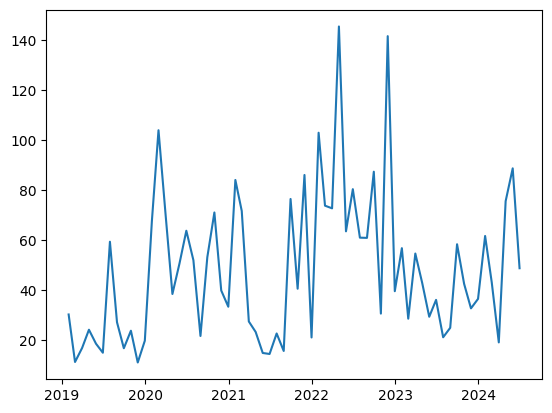

In [44]:
plt.plot(df1.High - df1.Low)
plt.show()

In [49]:
df.resample('M')

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_distribut

In [45]:
df1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-31,2704.10,2685.50,2708.90,2678.70,NaN,0.86%
2019-02-28,2784.50,2788.10,2793.70,2782.50,NaN,-0.28%
2019-03-31,2834.40,2828.30,2836.00,2819.20,NaN,0.67%
2019-04-30,2945.80,2937.10,2948.20,2924.10,NaN,0.10%
2019-05-31,2752.10,2766.20,2769.00,2750.50,NaN,-1.32%
...,...,...,...,...,...,...
2024-02-29,5096.27,5085.36,5104.99,5061.89,NaN,0.52%
2024-03-31,5254.35,5248.03,5264.85,5245.82,NaN,0.11%
2024-04-30,5035.69,5103.78,5110.83,5035.31,NaN,-1.57%


In [46]:
df2 = df1.loc['2021/1/1':]

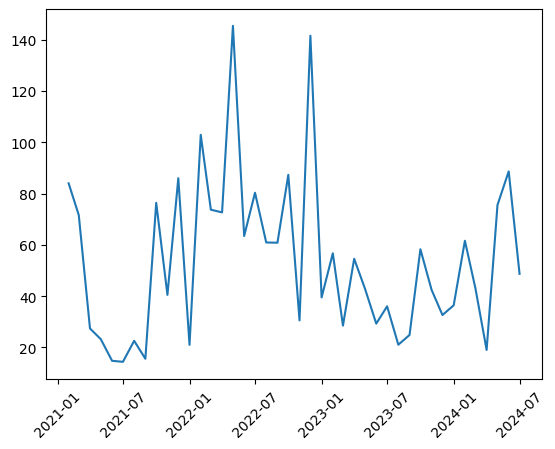

In [47]:
plt.plot(df2.High - df2.Low)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,Price,Open,High,Low,Vol.,Change %,Price_mv_3,Price_mv_5,Price_mv_10,Price_mv_20,Price_mv_60,Price_mv_180
Date,,,,,,,,,,,,
2019-01-02,2510.03,2476.96,2519.49,2467.47,NaN,0.13%,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,2447.89,2491.92,2493.14,2443.96,NaN,-2.48%,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,2531.94,2474.33,2538.07,2474.33,NaN,3.43%,2496.620000,NaN,NaN,NaN,NaN,NaN
2019-01-07,2549.69,2535.61,2566.16,2524.56,NaN,0.70%,2509.840000,NaN,NaN,NaN,NaN,NaN
2019-01-08,2574.41,2568.11,2579.82,2547.56,NaN,0.97%,2552.013333,2522.792,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-14,4372.59,4366.29,4391.82,4337.85,NaN,0.08%,4360.176667,4334.664,4300.187,4237.3100,4237.3100,4237.3100
2023-06-15,4425.84,4365.33,4439.20,4362.60,NaN,1.22%,4389.146667,4361.046,4320.669,4250.6635,4250.6635,4250.6635
2023-06-16,4409.59,4440.95,4448.47,4407.44,NaN,-0.37%,4402.673333,4383.192,4333.391,4261.2405,4261.2405,4261.2405


In [55]:
df['price_ret'] = df['Price'].pct_change(periods=1)

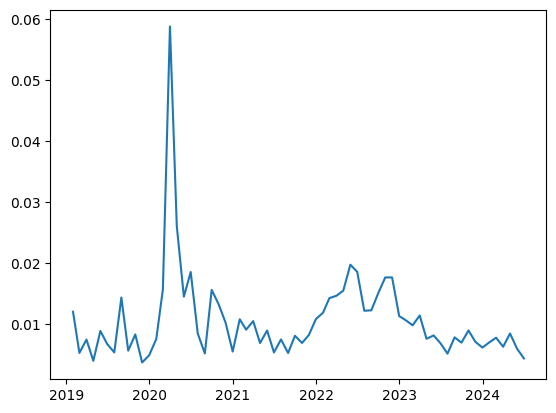

In [58]:
plt.plot(df['price_ret'].resample('M').std())
plt.show()

In [60]:
df = pd.read_csv('USD_KRW Historical Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1158 non-null   object 
 1   Price     1158 non-null   object 
 2   Open      1158 non-null   object 
 3   High      1158 non-null   object 
 4   Low       1158 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1158 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.5+ KB


In [74]:
def str2num(x):
  return float(x.replace(',', ''))

df = pd.read_csv('USD_KRW Historical Data.csv',
                 converters={'Price': str2num, 'Open': str2num,
                             'Open': str2num, 'High': str2num,
                             'Low': str2num},
                 parse_dates=['Date'])

df.set_index('Date', inplace=True)

In [75]:
df['Price_mv_30'] = df['Price'].rolling(window=30).mean()
df['Price_mv_180'] = df['Price'].rolling(window=180).mean()

len(df[df['Price_mv_30'] - df['Price_mv_180'] >= 0])

347

811

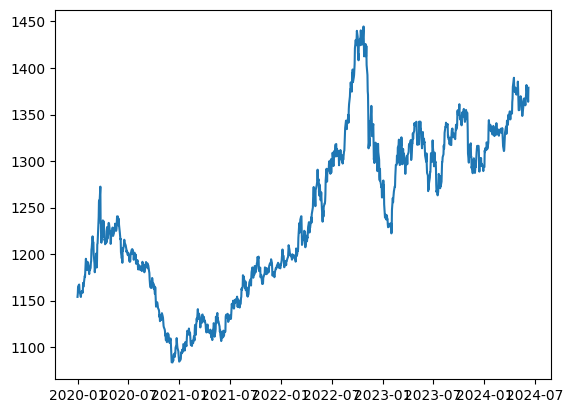

In [71]:
plt.plot(df['Price'])
plt.show()

In [56]:
df

,Price,Open,High,Low,Vol.,Change %,price_ret
Date,,,,,,,
2019-01-02,2510.00,2477.00,2519.50,2467.50,NaN,0.13%,NaN
2019-01-03,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%,-0.024741
2019-01-04,2531.90,2474.30,2538.10,2474.30,NaN,3.43%,0.034315
2019-01-07,2549.70,2535.60,2566.20,2524.60,NaN,0.70%,0.007030
2019-01-08,2574.40,2568.10,2579.80,2547.60,NaN,0.97%,0.009687
...,...,...,...,...,...,...,...
2024-06-05,5354.03,5314.48,5354.16,5297.64,NaN,1.18%,0.011848
2024-06-06,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%,-0.000200
2024-06-07,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%,-0.001115


In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '')
locale.atof('123,456.789')

123456.789

In [ ]:
df.sort_index(inplace=True)

In [73]:
df['Price_mv_5'] = df['Price'].rolling(window=5).mean()
df['Price_mv_10'] = df['Price'].rolling(window=10).mean()
df['Price_mv_20'] = df['Price'].rolling(window=20).mean()
df['Price_mv_30'] = df['Price'].rolling(window=30).mean()
df['Price_mv_60'] = df['Price'].rolling(window=60).mean()
df['Price_mv_180'] = df['Price'].rolling(window=180).mean()

In [ ]:
df.dropna(axis=0)
df.dropna(axis=1)

,Price,Open,High,Low,Vol.,Change %,Price_mv_3,Price_mv_5,Price_mv_10,Price_mv_20
Date,,,,,,,,,,
2019-01-02,2510.03,2476.96,2519.49,2467.47,NaN,0.13%,NaN,NaN,NaN,NaN
2019-01-03,2447.89,2491.92,2493.14,2443.96,NaN,-2.48%,NaN,NaN,NaN,NaN
2019-01-04,2531.94,2474.33,2538.07,2474.33,NaN,3.43%,2496.620000,NaN,NaN,NaN
2019-01-07,2549.69,2535.61,2566.16,2524.56,NaN,0.70%,2509.840000,NaN,NaN,NaN
2019-01-08,2574.41,2568.11,2579.82,2547.56,NaN,0.97%,2552.013333,2522.792,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-14,4372.59,4366.29,4391.82,4337.85,NaN,0.08%,4360.176667,4334.664,4300.187,4237.3100
2023-06-15,4425.84,4365.33,4439.20,4362.60,NaN,1.22%,4389.146667,4361.046,4320.669,4250.6635
2023-06-16,4409.59,4440.95,4448.47,4407.44,NaN,-0.37%,4402.673333,4383.192,4333.391,4261.2405


In [ ]:
from datetime import datetime

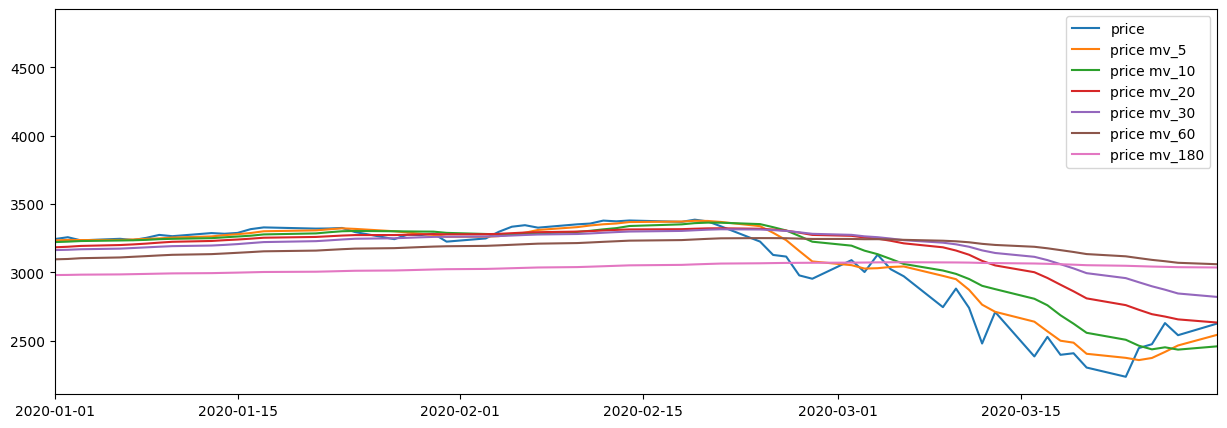

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(df['Price'], label='price')
ax.plot(df['Price_mv_5'], label='price mv_5')
ax.plot(df['Price_mv_10'], label='price mv_10')
ax.plot(df['Price_mv_20'], label='price mv_20')
ax.plot(df['Price_mv_30'], label='price mv_30')
ax.plot(df['Price_mv_60'], label='price mv_60')
ax.plot(df['Price_mv_180'], label='price mv_180')
plt.xlim([datetime(2020,1,1), datetime(2020,3,30)])
plt.legend()
plt.show()


In [ ]:
df.drop('Vol.', inplace=True, axis=1)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df

,Price,Open,High,Low,Change %,Price_mv_5,Price_mv_10,Price_mv_20,Price_mv_30,Price_mv_60,Price_mv_180,price_ret
Date,,,,,,,,,,,,
2019-09-18,3006.73,3001.50,3007.83,2978.57,0.03%,3005.470,2994.081,2948.2935,2930.590000,2952.369333,2850.068000,NaN
2019-09-19,3006.79,3010.36,3021.99,3003.16,0.00%,3004.914,2997.160,2952.4115,2934.683667,2953.859500,2852.827778,0.000020
2019-09-20,2992.07,3008.42,3016.37,2984.68,-0.49%,3001.850,2998.496,2955.8675,2936.483000,2955.164333,2855.851000,-0.004896
2019-09-23,2991.78,2983.50,2999.15,2982.23,-0.01%,3000.614,2999.831,2963.1010,2938.920667,2956.278667,2858.405667,-0.000097
2019-09-24,2966.60,3002.43,3007.98,2957.73,-0.84%,2992.794,2998.552,2967.5120,2941.682333,2956.692667,2860.721833,-0.008416
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-14,4372.59,4366.29,4391.82,4337.85,0.08%,4334.664,4300.187,4237.3100,4197.674333,4142.031000,3987.764333,0.000819
2023-06-15,4425.84,4365.33,4439.20,4362.60,1.22%,4361.046,4320.669,4250.6635,4208.844000,4149.080500,3992.089611,0.012178
2023-06-16,4409.59,4440.95,4448.47,4407.44,-0.37%,4383.192,4333.391,4261.2405,4220.456333,4156.957500,3995.926000,-0.003672


In [ ]:
sum(df['Price_mv_30'] - df['Price_mv_180'] > 0)

647

In [ ]:
sum(df['Price_mv_30'] - df['Price_mv_180'] > 0)

647

In [ ]:
cnt = 0

for index, row in df.iterrows():
    if row.Price_mv_30 > row.Price_mv_180:
        cnt += 1


for i in range(len(df)):
    if df.iloc[i]

In [ ]:
print(cnt)

647


In [ ]:
df['price_ret'] = df['Price'].pct_change(periods=1)

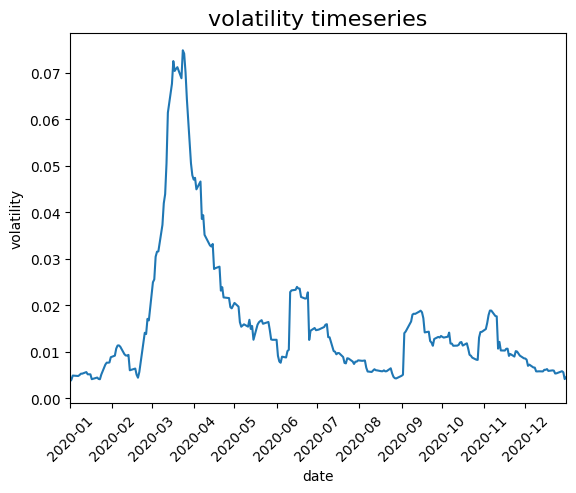

In [ ]:
plt.plot(df['price_ret'].rolling(10).std().dropna())
plt.xlabel('date')
plt.ylabel('volatility')
plt.title('volatility timeseries', fontsize=16)
plt.xticks(rotation=45)
plt.xlim([datetime(2020,1,1), datetime(2020,12,31)])
plt.show()

In [ ]:
df[['Price']].rolling(5).std()

,Price
Date,
2023-06-21,NaN
2023-06-20,NaN
2023-06-16,NaN
2023-06-15,NaN
2023-06-14,25.165307
...,...
2019-01-08,9.494948
2019-01-07,19.461852
2019-01-04,26.379183


In [ ]:
from datetime import datetime

In [ ]:
df.loc[df.index >= datetime(2023,1,1)]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-01-03,3824.14,3853.29,3878.46,3794.33,NaN,-0.40%
2023-01-04,3852.97,3840.36,3873.16,3815.77,NaN,0.75%
2023-01-05,3808.10,3839.74,3839.74,3802.42,NaN,-1.16%
2023-01-06,3895.08,3823.37,3906.19,3809.56,NaN,2.28%
2023-01-09,3892.09,3910.82,3950.57,3890.42,NaN,-0.08%
...,...,...,...,...,...,...
2023-06-14,4372.59,4366.29,4391.82,4337.85,NaN,0.08%
2023-06-15,4425.84,4365.33,4439.20,4362.60,NaN,1.22%
2023-06-16,4409.59,4440.95,4448.47,4407.44,NaN,-0.37%


In [ ]:
df['2020-01-01':'2022-01-01']

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,3257.85,3244.67,3258.14,3235.53,NaN,0.84%
2020-01-03,3234.85,3226.36,3246.15,3222.34,NaN,-0.71%
2020-01-06,3246.28,3217.55,3246.84,3214.64,NaN,0.35%
2020-01-07,3237.18,3241.86,3244.91,3232.43,NaN,-0.28%
2020-01-08,3253.05,3238.59,3267.07,3236.67,NaN,0.49%
...,...,...,...,...,...,...
2021-12-27,4791.19,4733.99,4791.49,4733.99,NaN,1.38%
2021-12-28,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%
2021-12-29,4793.06,4788.64,4804.06,4778.08,NaN,0.14%


In [ ]:
df['Date'].iloc[0]

'06/21/2023'

In [ ]:
print(df.shape)

(1125, 7)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1125 non-null   object 
 1   Price     1125 non-null   object 
 2   Open      1125 non-null   object 
 3   High      1125 non-null   object 
 4   Low       1125 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1125 non-null   object 
dtypes: float64(1), object(6)
memory usage: 61.6+ KB
None


In [ ]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/21/2023,"4,365.69","4,380.01","4,386.22","4,360.14",NaN,-0.52%
1,06/20/2023,"4,388.71","4,396.11","4,400.15","4,367.19",NaN,-0.47%
2,06/16/2023,"4,409.59","4,440.95","4,448.47","4,407.44",NaN,-0.37%
3,06/15/2023,"4,425.84","4,365.33","4,439.20","4,362.60",NaN,1.22%
4,06/14/2023,"4,372.59","4,366.29","4,391.82","4,337.85",NaN,0.08%


In [ ]:
pd.DataFrame([1, 2, 3])

,0
0,1
1,2
2,3


In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
print(titanic_df)


titanic 변수 type: <class 'pandas.core.frame.DataFrame'>
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..            

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('DataFrame 크기: ', titanic_df.shape)

DataFrame 크기:  (891, 12)


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [ ]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [ ]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [ ]:
print(titanic_df.shape)
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('titanic_df 컬럼 수:', titanic_df.shape[1])

(891, 12)
titanic_df 데이터 건수: 891
titanic_df 컬럼 수: 12


In [ ]:
print(titanic_df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
print(titanic_df['Embarked'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
# value_counts()는 디폴트로 dropna=True이므로 value_counts(dropna=True)와 동일.
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수: 891
기본 설정인 dropna=True로 value_counts()
S    644
C    168
Q     77
Name: Embarked, dtype: int64
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

* 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기

In [ ]:
import numpy as np

In [ ]:
col_name1=['col1']

In [ ]:
list1 = [1, 2, 3]
array1 = np.array(list1)

In [ ]:
print('array1 shape:', array1.shape )

array1 shape: (3,)


In [ ]:
# 리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print(df_list1)

   col1
0     1
1     2
2     3


In [ ]:
# 넘파이 ndarray를 이용해 DataFrame 생성.
# df_array1 = pd.DataFrame(array1, columns=col_name1)
df_array1 = pd.DataFrame(array1, columns=['col1'])
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [ ]:
df_array1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes


In [ ]:
df_array1.describe()

,col1
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [ ]:
import numpy as np

col_name1=['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)
print('array1 shape:', array1.shape )
# 리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)
# 넘파이 ndarray를 이용해 DataFrame 생성.
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [ ]:
a = [1, 2, 3]
A = [4, 5, 6]
print(a)
print(A)

[1, 2, 3]
[4, 5, 6]


In [ ]:
# 3개의 칼럼명이 필요함.
col_name2=['col1', 'col2', 'col3']

In [ ]:
# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1, 2, 3],
         [11, 12, 13]]

In [ ]:
print(list2)

[[1, 2, 3], [11, 12, 13]]


In [ ]:
array2 = np.array(list2)

In [ ]:
print('array2 shape:', array2.shape )

array2 shape: (2, 3)


In [ ]:
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [ ]:
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [ ]:
# 3개의 칼럼명이 필요함.
col_name2=['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape )
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


In [ ]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}

In [ ]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


* DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기

In [ ]:
type(df_dict)

pandas.core.frame.DataFrame

In [ ]:
df_dict.values

array([[ 1,  2,  3],
       [11, 22, 33]])

In [ ]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)



df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]


In [ ]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


### DataFrame의 컬럼 데이터 셋 Access

In [ ]:
titanic_df['Age_0'] = 0
titanic_df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [ ]:
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


In [ ]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0,1


In [ ]:
titanic_df.drop('Age_0', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,370.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,290.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,360.0,1


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,370.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0,1


### DataFrame 데이터 삭제

In [ ]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1 )
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,370.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,290.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,360.0,1


In [ ]:
titanic_df = titanic_df.drop('Age_0', axis=1 )

In [ ]:
titanic_df.drop('Age_0', axis=1, inplace=True)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,370.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,290.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,360.0,1


In [ ]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [ ]:
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True)
print(' inplace=True 로 drop 후 반환된 값:',drop_result)
titanic_df.head(3)

 inplace=True 로 drop 후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)

In [ ]:
print(titanic_df)

     PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked  Age_by_10  Family_No
0              1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S      320.0          2
1              2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C      480.0          2
2              3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S      360.0          1
3              4         1       1  Futrelle, M...  female  35.0      1      0          113803  53.1000  C123        S      450.0          2
4              5         0       3  Allen, Mr. ...    male  35.0      0      0          373450   8.0500   NaN        S      450.0          1
..           ...       ...     ...             ...     ...   ...    ...    ...             ...      ...   ...      ...        ...        ...
886          

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([4,5,6], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Age_by_10  Family_No
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S      450.0          2
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S      450.0          1
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q        NaN          1
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Age_by_10  Family_No
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S      450.0          2
7            8         0       3  Palsson, Ma...    male   2.0      3      1  349909  21.0750   NaN        S      120.0          5
8            9         1  

In [ ]:
titanic_df['Embarked'].fillna(0)

3      S
7      S
8      S
9      C
10     S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 885, dtype: object

In [ ]:
df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df.drop('a', axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)
df

,b
1,4


### Index 객체

In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# 원본 파일 재 로딩
# titanic_df = pd.read_csv('titanic_train.csv')
# Index 객체 추출
indexes = titanic_df.index
print(indexes)
# Index 객체를 실제 값 arrray로 변환
print('Index 객체 array값:\n',indexes.values)


RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [ ]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [ ]:
indexes[0] = 5

TypeError: ignored

In [ ]:
series_fair = titanic_df['Fare']
print(series_fair)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


In [ ]:
type(series_fair)

pandas.core.series.Series

In [ ]:
series_fair + 3

0      10.2500
1      74.2833
2      10.9250
3      56.1000
4      11.0500
        ...   
886    16.0000
887    33.0000
888    26.4500
889    33.0000
890    10.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.reset_index(inplace=False)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


In [ ]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>


In [ ]:
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


In [ ]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


### 데이터 셀렉션 및 필터링

* DataFrame의 [ ] 연산자

In [ ]:
titanic_df[ 'Pclass' ].head(3)

0    3
1    1
2    3
Name: Pclass, dtype: int64

In [ ]:
titanic_df[ ['Survived', 'Pclass'] ].head(3)

,Survived,Pclass
0,0,3
1,1,1
2,1,3


In [ ]:
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

단일 컬럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: ignored

In [ ]:
 titanic_df.iloc[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.loc[titanic_df['Age'] < 20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Ma...",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs...",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, ...",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Mi...",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Maste...",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. S...",female,18.0,0,1,392091,9.3500,NaN,S
869,870,1,3,"Johnson, Ma...",male,4.0,1,1,347742,11.1333,NaN,S
875,876,1,3,"Najib, Miss...",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr...",male,19.0,0,0,349212,7.8958,NaN,S


In [ ]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

In [ ]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


* DataFrame iloc[ ] 연산자

In [ ]:
data = {'Name': ['Chulmin', 'Eunkyung','Jinwoong','Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [ ]:
data_df.iloc[0, 2]

'Male'

In [ ]:
# 아래 코드는 오류를 발생시킵니다.
data_df.iloc[0, 'Name']

ValueError: ignored

In [ ]:
# 아래 코드는 오류를 발생합니다.
data_df.iloc['one', 0]

ValueError: ignored

In [ ]:
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [ ]:
data_df.iloc[:, :2]

,Name,Year
one,Chulmin,2011
two,Eunkyung,2016
three,Jinwoong,2015
four,Soobeom,2015


In [ ]:
data_df.iloc[:, 0:-1]

,Name,Year
one,Chulmin,2011
two,Eunkyung,2016
three,Jinwoong,2015
four,Soobeom,2015


In [ ]:
print("\n 맨 마지막 칼럼 데이터 [:, -1] \n", data_df.iloc[:, -1])
print("\n 맨 마지막 칼럼을 제외한 모든 데이터 [:, :-1] \n", data_df.iloc[: , :-1])


 맨 마지막 칼럼 데이터 [:, -1] 
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 칼럼을 제외한 모든 데이터 [:, :-1] 
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


* DataFrame loc[ ] 연산자

In [ ]:
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


In [ ]:
data_df.loc['one', 'Name']

'Chulmin'

In [ ]:
# 아래 코드는 오류를 발생합니다.
data_df_reset.loc[0, 'Name']

NameError: ignored

In [ ]:
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

위치기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


* 불린 인덱싱

In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
b = titanic_df['Age'] > 60
b

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
titanic_ = titanic_df.loc[b]
print(type(titanic_))
titanic_

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(30)

In [ ]:
value_1 = np.percentile(titanic_df['Age'].values, 1)
value_99 = np.percentile(titanic_df['Age'].values, 99)

In [ ]:
titanic_df.loc[(titanic_df['Age'] > value_1) & (titanic_df['Age'] < value_99)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, R...",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Mis...",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, M...",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. K...",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# titanic_df = pd.read_csv('titanic_train.csv')
titanic_ = titanic_df.loc[titanic_df['Age'] > 60]
print(type(titanic_))
titanic_

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr...",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [ ]:
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(5)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0
116,"Connors, Mr...",70.5
170,Van der hoe...,61.0


In [ ]:
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
456,457,0,1,"Millet, Mr....",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,Artagaveyti...,male,71.0,0,0,PC 17609,49.5042,NaN,C
545,546,0,1,"Nicholson, ...",male,64.0,0,0,693,26.0000,NaN,S
555,556,0,1,"Wright, Mr....",male,62.0,0,0,113807,26.5500,NaN,S
625,626,0,1,"Sutton, Mr....",male,61.0,0,0,36963,32.3208,D50,S


In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


In [ ]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='male'
titanic_df[ cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. ...",male,62.0,0,0,113514,26.5500,C87,S
438,439,0,1,"Fortune, Mr...",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
456,457,0,1,"Millet, Mr....",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,Artagaveyti...,male,71.0,0,0,PC 17609,49.5042,NaN,C
545,546,0,1,"Nicholson, ...",male,64.0,0,0,693,26.0000,NaN,S
555,556,0,1,"Wright, Mr....",male,62.0,0,0,113807,26.5500,NaN,S
625,626,0,1,"Sutton, Mr....",male,61.0,0,0,36963,32.3208,D50,S


### 정렬, Aggregation함수, GroupBy 적용

* DataFrame, Series의 정렬 - sort_values()


In [ ]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Age'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Ma...",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Mi...",female,2.00,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Mast...",male,4.00,0,2,33638,81.8583,A34,S


In [ ]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Age'], ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, M...",male,74.0,0,0,347060,7.775,NaN,S
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. ...",male,65.0,0,0,336439,7.750,NaN,Q


* Aggregation 함수 적용

In [ ]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
print(titanic_df[['Age', 'Fare']].mean())
print(titanic_df[['Age', 'Fare']].max())
print(titanic_df[['Age', 'Fare']].min())

Age     29.758889
Fare    32.204208
dtype: float64
Age      80.0000
Fare    512.3292
dtype: float64
Age     0.42
Fare    0.00
dtype: float64


* groupby() 이용하기

In [ ]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
print(titanic_groupby)

In [ ]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,214
2,184,184,184,184,184,184,184,184,184,16,184
3,491,491,491,491,491,491,491,491,491,12,491


In [ ]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [ ]:
titanic_df.groupby('Embarked')['Age'].agg([max, min])

,max,min
Embarked,,
C,71.0,0.42
Q,70.5,2.00
S,80.0,0.67


In [ ]:
titanic_df.groupby('Pclass')['Fare'].agg('mean')

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [ ]:
titanic_df.groupby('Pclass').agg({'Age':'max', 'SibSp':'sum', 'Fare':'mean'})

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


In [ ]:
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


### 결손 데이터 처리하기
* isna()로 결손 데이터 여부 확인

In [ ]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
titanic_df.isna( ).sum( )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* fillna( ) 로 Missing 데이터 대체하기

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


In [ ]:
titanic_df['Age'].mean()

29.758888888888887

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공

In [ ]:
def get_square(a):
    return a**2

print(get_square(3))
print('3의 제곱은:',get_square(3))

9
3의 제곱은: 9


In [ ]:
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

3의 제곱은: 9


In [ ]:
a=[1,2,3]
squares = map(lambda x : x**3, a)
list(squares)

[1, 8, 27]

In [ ]:
a=[1,2,3]
squares = map(lambda_square, a)
list(squares)

[1, 4, 9]

In [ ]:
lambda_len = lambda x : len(x)

In [ ]:
lambda_len('abc')

3

In [ ]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
# titanic_df['Name_len']= titanic_df['Name'].apply(lambda_len)
titanic_df[['Name','Name_len']].head(5)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22
3,"Futrelle, M...",44
4,"Allen, Mr. ...",24


In [ ]:
lambda_child_adult = lambda x : 'Child' if x <=19 else 'Adult'

In [ ]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <19 else 'Adult')
# titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda_child_adult)
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,30.0,Adult
6,54.0,Adult
7,2.0,Child


In [ ]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<19 else ('Adult' if x < 60 else
                                                                                  'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      726
Child      139
Elderly     26
Name: Age_cat, dtype: int64

In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

In [ ]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [ ]:
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()


,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
